# q-1-1

# Part (i): 

In [137]:
import numpy as np
import pandas as pd
import sys
import math
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
filename1="./RobotDataset/Robot1"
filename2="./RobotDataset/Robot2"

In [138]:
#As the given data does not have column names defined, hence giving them names accordingly, while reading the file
colnames=['class', 'a1', 'a2', 'a3','a4','a5','a6','Id'] 

robot1 = pd.read_csv(filename, sep=' ', names=colnames,skipinitialspace=True)

robot2 =pd.read_csv(filename2,sep=' ',names=colnames,skipinitialspace=True)

In [139]:
#To calculate the distance we need to bring down all the values of all the columns within the range of 0 and 1
#and hence normalize the data

#bringing down the values in the range(0,1)
def normalise(data):
    result=data
    for col in data.columns:
        if col!='class'and col!='Id':
            minimum=data[col].min()
            maximum=data[col].max()
            result[col]=((data[col])-minimum)/(maximum-minimum)
    return result

#normalizing for robot1
robot1=normalise(robot1)

#normalizing for robot2
robot2=normalise(robot2)

In [140]:
#for random spliting of data into training and validate

#for robot1
robot1 = robot1.sample(frac=1)
train1, validate1 = np.split(robot1, [int(.8*len(robot1))])

#for robot2
robot2=robot2.sample(frac=1)
train2,validate2 = np.split(robot2, [int(.8*len(robot2))])

In [141]:
#for predicting in KNN, what we do is, for any given row, we try and calculate the distance with every row of the 
#training data and then select k 

def predict(row,k,t,dis_func):
    #t: train data set
    #dis_func: distance function used
    #k: k value provided 
    #row: point under consideration
    
    #get the sorted list according to the function passed
    #structure of list, tuple of distance and corresponding class lable
    distance=dis_func(t,row)

    #knn is a list of size 2, zeroth index represents '0' of class lable, first index represents '1' of class lable
    knn=[0,0]
    
    #take the first k distances and calculate the total number of times '0' and '1' appearing in class lable
    for i in range(0,k):
        knn[distance[i][1]]+=1
    
    #return the class label which occured most number of times
    if knn[1]>=knn[0]:
        return 1 
    else:
        return 0

In [142]:
#calculate distance using euclidean formula 

def euclidean(t,row):
    distance=[]
    columns=['a1','a2','a3','a4','a5','a6']
    
    #t is the training data, to find the distance with all points, a row equals a point
    #row is the given point with which distance is to be calculated
    for index1,row1 in t.iterrows():
        temp=0
        #for one row, iterate over all the columns and sum up the square of difference (formula for euclidean)
        for col in columns:
            temp+=((row1[col]-row[col])**2) 
        
        #take square root of the above aggregate, this is the euclidean distance between current considered points
        #save the distance and corresponding class of the training row under consideration, in a list "distance"
        distance.append((math.sqrt(temp),row1['class']))
    
    
    #sorting all the distances in increasing order
    distance.sort()
    
    #return the distance list
    return distance

In [143]:
#calculate distance using manhattan formula 

def manhattan(t,row):
    columns=['a1','a2','a3','a4','a5','a6']
    distance=[]
    
    #t is the training data, to find the distance with all points, a row equals a point
    #row is the given point with which distance is to be calculated
    for index1,row1 in t.iterrows():
        temp=0
        
        #for one row traverse over all the columns and sum up the absolute of corresponding differences
        for col in columns:
            temp+=abs(row1[col]-row[col])
         
        #store the distance and corresponding class lable value
        distance.append((temp,row1['class']))
        
    #sort the distances in increasing order
    distance.sort()
    
    #return the distance list
    return distance

In [144]:
#calculate distance using manhattan formula 

def chebyshev(t,row):
    columns=['a1','a2','a3','a4','a5','a6']
    distance=[]
    
    #t is the training data, to find the distance with all points, a row equals a point
    #row is the given point with which distance is to be calculated
    for index1,row1 in t.iterrows():
        max_value=-sys.maxint-1
        
        #for a row traverse all the columns and find out the max value of absolute of corresponding differences
        for col in columns:
            diff=abs(row1[col]-row[col])
            max_value=max(diff,max_value)
            
        #store the distance and corresponding class lable value   
        distance.append((max_value,row1['class']))
        
    #sort the distances in increasing order
    distance.sort()
    
    #return the distance list
    return distance

In [145]:
#calculate accurancy for training data t and a given function func

def calculate_accuracy(t,func,validate):
    l=len(t)
    l=int(math.sqrt(l))
    l+=1
    
    #for plotting graph
    k_level=[]
    accu_list=[]
    max_acc=-sys.maxint-1
    max_prec=0
    max_recall=0
    max_f1sc=0
    final_k=0
    #range of k is from 1 to square root of the number of rows of training data set provided
    for i in range(1,l,2):    #as k value should always be odd, therefore step size is equal to 2 (third arg)
        #for confusion matrix
        actual_value=[]
        predicted_value=[]
        tp=0
        tn=0
        fp=0
        fn=0
        #for each row in validate
        for index,row in validate.iterrows(): 
            x=predict(row,i,t,func)
            if row['class']==1 and x==1:
                tp+=1
            if row['class']==0 and x==0:
                tn+=1
            if row['class']==1 and x==0:
                fn+=1
            if row['class']==0 and x==1:
                fp+=1
            #for confusion matrix
            actual_value.append(row['class'])
            predicted_value.append(x)
            
        #for confusion matrix
        actu = pd.Series(actual_value, name='Actual')
        pred = pd.Series(predicted_value, name='Predicted')
        df_confusion = pd.crosstab(actu, pred)
        
        if tp+tn+fp+fn!=0:
            acc_cm=float(tp+tn)/(tp+tn+fp+fn)#accuracy_cm(df_confusion)
        else:
            acc_cm=0
        if tp+fn!=0:
            recal_cm=float(tp)/(tp+fn)#recall_cm(df_confusion)
        else:
            recal_cm=0
        if tp+fp!=0:
            preci_cm=float(tp)/(tp+fp)#precision_cm(df_confusion)
        else:
            preci_cm=0
        if recal_cm!=0 and preci_cm!=0:
            f1_sc=(2/((1/recal_cm)+(1/preci_cm)))#f1Score_cm(preci_cm,recal_cm)
        else:
            f1_sc=0
        #to plot the graph between different k values and its corresponding accuracy
        k_level.append(i)
        accu_list.append(acc_cm)
        if max_acc<acc_cm:
            max_acc=acc_cm
            final_k=i
            max_prec=preci_cm
            max_recall=preci_cm
            max_f1sc=preci_cm
    return (k_level,accu_list,final_k,max_acc,max_prec,max_recall,max_f1sc)

In [146]:
k1_list,accu1,k1,acc1,pre1,recal1,f1sc1=calculate_accuracy(train1,euclidean,validate1)
k2_list,accu2,k2,acc2,pre2,recal2,f1sc2=calculate_accuracy(train1,chebyshev,validate1)
k3_list,accu3,k3,acc3,pre3,recal3,f1sc3=calculate_accuracy(train1,manhattan,validate1)
k11_list,accu11,k11,acc11,pre11,recal11,f1sc11=calculate_accuracy(train2,euclidean,validate2)
k22_list,accu22,k22,acc22,pre22,recal22,f1sc22=calculate_accuracy(train2,chebyshev,validate2)
k33_list,accu33,k33,acc33,pre33,recal33,f1sc33=calculate_accuracy(train2,manhattan,validate2)


# Part (ii): Iris


In [147]:
irisfile="./Iris/Iris.csv"
colnames=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class'] 
data = pd.read_csv(irisfile, names=colnames,skipinitialspace=True)
#bringing down the values in the range(0,1)
def normalise_iris(data):
    result=data
    for col in data.columns:
        if col!='class':
            minimum=data[col].min()
            maximum=data[col].max()
            result[col]=((data[col])-minimum)/(maximum-minimum)
    return result
data=normalise_iris(data)

In [148]:
data = data.sample(frac=1)
train, validate = np.split(data, [int(.8*len(data))])

In [149]:
def predict_iris(row,k,t,dis_func):
    distance=dis_func(t,row)
    knn={}
    for i in range(0,k):
        if distance[i][1] not in knn.keys():
            knn[distance[i][1]]=1
        else:
            knn[distance[i][1]]+=1
    maxi=0
    label=''
    for i in knn.keys():
        if maxi<knn[i]:
            maxi=knn[i]
            label=i
    return label

In [150]:
def euclidean_iris(t,row):
    distance=[]
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    for index1,row1 in t.iterrows():
        temp=0
        for col in columns:
            temp+=((row1[col]-row[col])**2) 
        distance.append((math.sqrt(temp),row1['class']))#distance is list of distance and corresponding class label
    distance.sort()#sorting all the distances in increasing order
    return distance

In [151]:
def manhattan_iris(t,row):
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    distance=[]
    for index1,row1 in t.iterrows():
        temp=0
        for col in columns:
            temp+=abs(row1[col]-row[col])
        distance.append((temp,row1['class']))
    distance.sort()
    return distance

In [152]:
def chebyshev_iris(t,row):
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    distance=[]
    for index1,row1 in t.iterrows():
        max_value=-sys.maxint-1
        for col in columns:
            if max_value<abs(row1[col]-row[col]):
                max_value=abs(row1[col]-row[col])
        distance.append((max_value,row1['class']))
    distance.sort()
    return distance

In [153]:
def accuracy_cm(df_confusion):
    tpptn=0 #tp +tn
    for i in df_confusion:
        tpptn+=df_confusion[i][i]
    total=0
    for i in df_confusion:
        total+=df_confusion[i].sum()
    return float(tpptn)/total

In [154]:
def precision_cm(df_confusion):
    return np.sum(np.diag(df_confusion)/ np.sum(df_confusion, axis = 0))/len(np.diag(df_confusion)/ np.sum(df_confusion, axis = 0))

In [155]:
def recall_cm(df_confusion):
    return np.sum(np.diag(df_confusion) / np.sum(df_confusion, axis = 1))/len(np.diag(df_confusion) / np.sum(df_confusion, axis = 1))

In [156]:
def f1Score_cm(precision,recall):
    return float(2)/((1/recall)+(1/precision))

In [157]:
#calculate accurancy for training data t and a given function func

def calculate_accuracy_iris(t,func,validate):
    l=len(t)
    l=int(math.sqrt(l))
    l+=1
    
    #for plotting graph
    k_level=[]
    accu_list=[]
    max_acc=-sys.maxint-1
    final_k=0
    max_prec=0
    max_recall=0
    max_f1sc=0
    #range of k is from 1 to square root of the number of rows of training data set provided
    for i in range(1,l):    #here one skip is performed each time as class lable has 3 unique values
        #for confusion matrix
        actual_value=[]
        predicted_value=[]
        
        #for each row in validate
        for index,row in validate.iterrows(): 
            x=predict_iris(row,i,t,func)
            #for confusion matrix
            actual_value.append(row['class'])
            predicted_value.append(x)
            
        actu = pd.Series(actual_value, name='Actual')
        pred = pd.Series(predicted_value, name='Predicted')
        df_confusion = pd.crosstab(actu, pred)
        
        acc_cm=accuracy_cm(df_confusion)
        preci_cm=precision_cm(df_confusion)
        recal_cm=recall_cm(df_confusion)
        f1_sc=f1Score_cm(preci_cm,recal_cm)
        #to plot the graph between different k values and its corresponding accuracy
        k_level.append(i)
        accu_list.append(acc_cm)
        if max_acc<acc_cm:
            max_acc=acc_cm
            final_k=i
            max_prec=preci_cm
            max_recall=preci_cm
            max_f1sc=preci_cm
        
    return (k_level,accu_list,final_k,max_acc,max_prec,max_recall,max_f1sc)

# q-1-1-1

# Accuracy, Precision, Recall, k-value and F1 score

In [158]:
print "*******ROBOT1*******"
print
print "Eucledian"
print
print "k_value: ",k1
print "max accuracy: ",acc1
print "precision: ",pre1
print "recall: ",recal1
print "f1 score: ",f1sc1
print
print "chebyshev"
print
print "k_value: ",k2
print "max accuracy: ",acc2
print "precision: ",pre2
print "recall: ",recal2
print "f1 score: ",f1sc2
print
print "manhattan"
print
print "k_value: ",k3
print "max accuracy: ",acc3
print "precision: ",pre3
print "recall: ",recal3
print "f1 score: ",f1sc3
print


*******ROBOT1*******

Eucledian

k_value:  7
max accuracy:  0.76
precision:  0.636363636364
recall:  0.636363636364
f1 score:  0.636363636364

chebyshev

k_value:  3
max accuracy:  0.76
precision:  1.0
recall:  1.0
f1 score:  1.0

manhattan

k_value:  9
max accuracy:  0.8
precision:  0.75
recall:  0.75
f1 score:  0.75



In [159]:
print "*******ROBOT2*******"
print
print "Eucledian"
print
print "k_value: ",k11
print "max accuracy: ",acc11
print "precision: ",pre11
print "recall: ",recal11
print "f1 score: ",f1sc11
print
print "chebyshev"
print
print "k_value: ",k22
print "max accuracy: ",acc22
print "precision: ",pre22
print "recall: ",recal22
print "f1 score: ",f1sc1
print
print "manhattan"
print
print "k_value: ",k33
print "max accuracy: ",acc33
print "precision: ",pre33
print "recall: ",recal33
print "f1 score: ",f1sc33
print


*******ROBOT2*******

Eucledian

k_value:  3
max accuracy:  0.88
precision:  0.823529411765
recall:  0.823529411765
f1 score:  0.823529411765

chebyshev

k_value:  1
max accuracy:  0.76
precision:  1.0
recall:  1.0
f1 score:  0.636363636364

manhattan

k_value:  3
max accuracy:  0.88
precision:  0.923076923077
recall:  0.923076923077
f1 score:  0.923076923077



In [160]:
#IRIS

k1_listi,accu1i,k1i,acc1i,prec1i,recal1i,f1sc1i=calculate_accuracy_iris(train,euclidean_iris,validate)

k2_listi,accu2i,k2i,acc2i,prec2i,recal2i,f1sc2i=calculate_accuracy_iris(train,chebyshev_iris,validate)

k3_listi,accu3i,k3i,acc3i,prec3i,recal3i,f1sc3i=calculate_accuracy_iris(train,manhattan_iris,validate)


In [161]:
print "*******IRIS*******"
print
print "Eucledian"
print
print "k: ",k1i
print "max accuracy: ",acc1i
print "precision: ",prec1i
print "recall: ",recal1i
print "f1 Score: ",f1sc1i
print
print "chebyshev"
print
print "k: ",k2i
print "max accuracy: ",acc2i
print "precision: ",prec2i
print "recall: ",recal2i
print "f1 Score: ",f1sc2i
print
print "manhattan"
print
print "k: ",k3i
print "max accuracy: ",acc3i
print "precision: ",prec3i
print "recall: ",recal3i
print "f1 Score: ",f1sc3i
print


*******IRIS*******

Eucledian

k:  9
max accuracy:  0.962962962963
precision:  0.9696969696969697
recall:  0.9696969696969697
f1 Score:  0.9696969696969697

chebyshev

k:  2
max accuracy:  1.0
precision:  1.0
recall:  1.0
f1 Score:  1.0

manhattan

k:  5
max accuracy:  0.962962962963
precision:  0.9696969696969697
recall:  0.9696969696969697
f1 Score:  0.9696969696969697



# q-1-1-2

# Graphs for Euclidean, Chebyshev and Manhattan

Text(0,0.5,'accuracy')

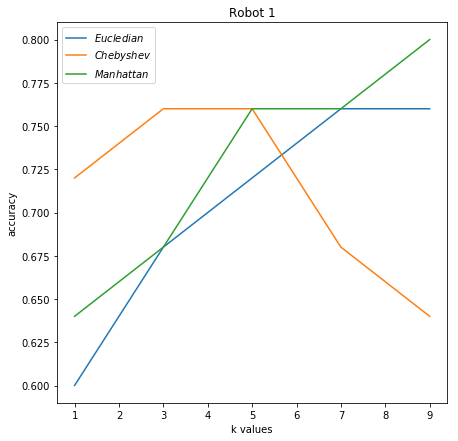

In [162]:
fig,axes=plt.subplots(figsize=(7,7))

axes.plot(k1_list,accu1,label=r"$Eucledian$")

axes.plot(k2_list,accu2,label=r"$Chebyshev$")

axes.plot(k3_list,accu3,label=r"$Manhattan$")

legend=axes.legend(loc='best')
axes.set_title('Robot 1')
plt.xlabel('k values')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

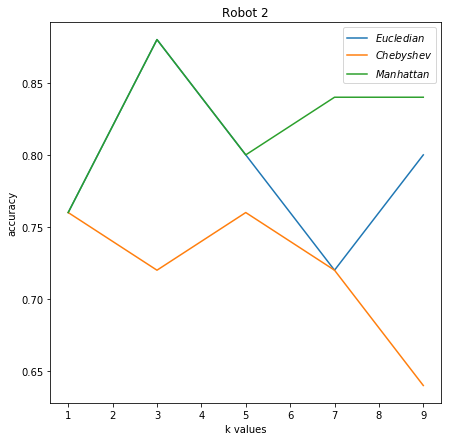

In [163]:
fig,axes=plt.subplots(figsize=(7,7))

axes.plot(k11_list,accu11,label=r"$Eucledian$")

axes.plot(k22_list,accu22,label=r"$Chebyshev$")

axes.plot(k33_list,accu33,label=r"$Manhattan$")
legend=axes.legend(loc='best')
axes.set_title('Robot 2')
plt.xlabel('k values')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

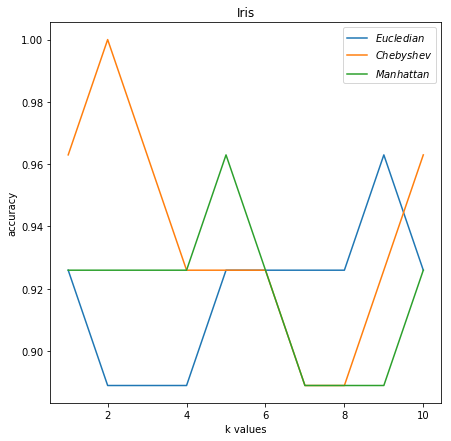

In [164]:
fig,axes=plt.subplots(figsize=(7,7))

axes.plot(k1_listi,accu1i,label=r"$Eucledian$")

axes.plot(k2_listi,accu2i,label=r"$Chebyshev$")

axes.plot(k3_listi,accu3i,label=r"$Manhattan$")

legend=axes.legend(loc='best')
axes.set_title('Iris')
plt.xlabel('k values')
plt.ylabel('accuracy')

# Test file

# For robot1

In [165]:
testfile=raw_input("Test File: ")
colnames=[ 'a1', 'a2', 'a3','a4','a5','a6','Id'] 

test = pd.read_csv(testfile, sep=' ', names=colnames,skipinitialspace=True)
test=normalise(test)
for index,row in test.iterrows():
    print predict(row,3,train1,euclidean)

Test File: ./test_robot.csv
0
0
0
0
0
0
0
0
0
0


# For iris 

In [166]:
testiris=raw_input("Test File: ")
colnames_iris=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class']

testi = pd.read_csv(testiris, sep=',', names=colnames_iris,skipinitialspace=True)
testi=normalise_iris(testi)
for index,row in testi.iterrows():
    print predict_iris(row,7,train,euclidean_iris)

Test File: ./test_iris.csv
Iris-setosa
Iris-virginica
Iris-setosa
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-setosa


# Comparision With Scikit-learn

In [167]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt

In [168]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [169]:
def compareScikit(df,target,identifier=None):
    le = preprocessing.LabelEncoder()
#     df[identifier] = le.fit_transform(df[identifier])
    if identifier is not None:
        df[identifier] = le.fit_transform(df[identifier])
    # dataset_R1=dataset_R1.drop('index',1)
    cols = [col for col in df.columns if col not in [target,identifier]]
    data=df[cols]
    target=df[target]
    data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 10)

    scaler = StandardScaler()  
    scaler.fit(data_train)

    data_train = scaler.transform(data_train)  
    data_test = scaler.transform(data_test)  
    classifier = KNeighborsClassifier(n_neighbors=5)  
    classifier.fit(data_train, target_train) 
    y_pred = classifier.predict(data_test) 
    error = []

    l=len(df)
    l=int(math.sqrt(l))
    l+=1
    
    for i in range(1, l):  
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(data_train, target_train)
        pred_i = knn.predict(data_test)
        error.append(np.mean(pred_i != target_test))
    plt.figure(figsize=(7, 7))  
    plt.plot(range(1, l), error, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')  
    plt.xlabel('K Value')  
    plt.ylabel('Mean Error')
    score = accuracy_score(target_test, y_pred)
    print("score",score)


# Robot 1

('score', 0.6)


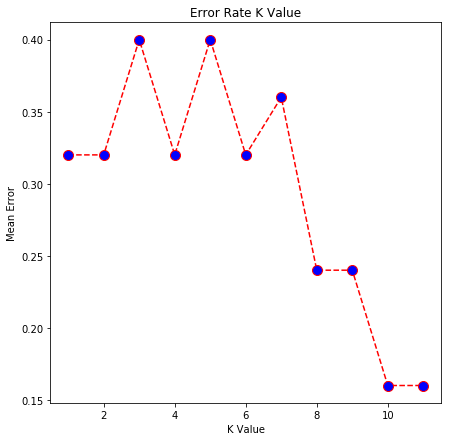

In [170]:
compareScikit(robot1,'class','Id')

# Robot 2  

('score', 0.72)


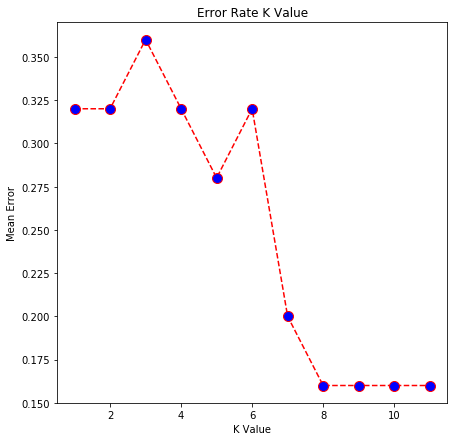

In [171]:
compareScikit(robot2,'class','Id')

# Iris

('score', 0.9629629629629629)


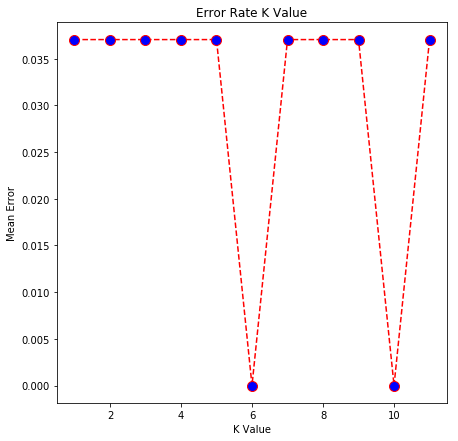

In [172]:
compareScikit(data,'class',None)

# Possible reasons for better performance

1) There is no training phase or it is very minimal, hence no extra time is utilized to do the same.


2) There is no data distribution.